## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [24]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

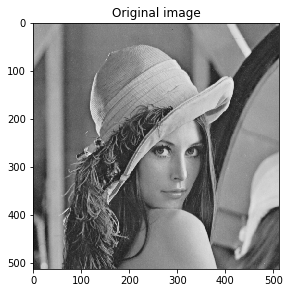

In [25]:
image='./images/lena-grey.bmp'
lena=plt.imread(image)
io.imshow(lena)
plt.title('Original image')


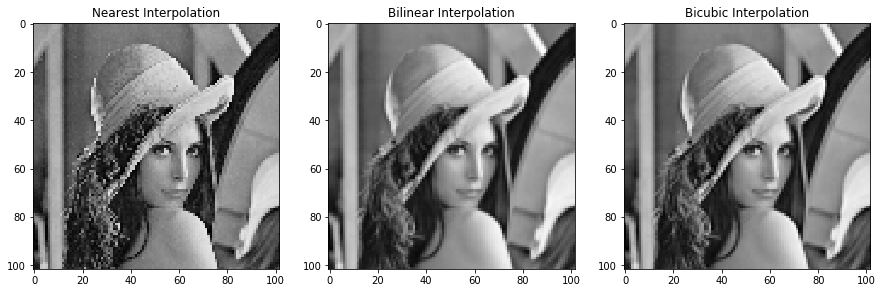

In [26]:
lena_nearest=misc.imresize(lena,20,interp='nearest')
lena_bilinear=misc.imresize(lena,20,interp='bilinear')
lena_bicubic=misc.imresize(lena,20,interp='bicubic')


fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax0,ax1,ax2=axes.ravel()

ax0.imshow(lena_nearest,cmap=cm.gray)
ax0.set_title('Nearest Interpolation')

ax1.imshow(lena_bilinear,cmap=cm.gray)
ax1.set_title('Bilinear Interpolation')

ax2.imshow(lena_bicubic,cmap=cm.gray)
ax2.set_title('Bicubic Interpolation')



**Q.2 Similar to the function of `my_blending.m` that you saw before define your function of blending ** 

**Therefore define three functions `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


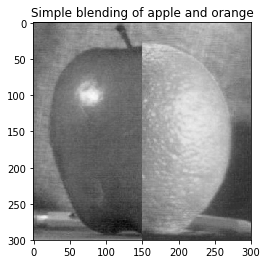

In [27]:
def simple_blending(img1, img2): 
 
    img = np.zeros(np.shape(img1))  
    row, col = np.shape(img) 
    for i in range(0, row): 
        for j in range(0, col): 
            img[i,j]=img2[i,j] 
    for i in range(0, row): 
        for j in range(0, np.ceil(col/2).astype('ubyte')): 
            img[i,j]=img1[i,j] 
    return img 
 
from skimage.color import rgb2gray 
img1 = './images/apple.jpeg' 
apple_im = io.imread(img1) 
apple_gray=rgb2gray(apple_im)  
apple_gray=img_as_ubyte(apple_gray) 
 
img2 = './images/orange.jpeg' 
orange_im = io.imread(img2) 
orange_gray=rgb2gray(orange_im) 
orange_gray=img_as_ubyte(orange_gray) 
 
 
                        
blend_img = simple_blending(apple_gray, orange_gray) 
 
plt.imshow(blend_img, cmap=cm.gray) 
plt.title ('Simple blending of apple and orange') 

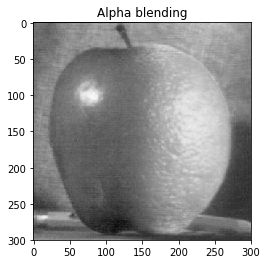

In [29]:
def alpha_blend(img1, img2, window): 
    blend_img = simple_blending(img1, img2) 
    row, col = blend_img.shape  
    x1 = np.ceil(col/2).astype('ubyte')-window    
    x2 = np.ceil(col/2).astype('ubyte')+window    
    x = np.arange(x1, x2) 
    alpha = x/(x1-x2)-x2/(x1-x2) 
    for i in range(0, row): 
        for j in range(x1,x2): 
            blend_img[i,j] = alpha[j - np.ceil(col/2).astype('ubyte')-window]*img1[i,j] + (1-alpha[j - np.ceil(col/2).astype('ubyte')-window])*img2[i,j] 
    return blend_img  
      
 
blending_img= alpha_blend(apple_gray,orange_gray,30) 
 
plt.imshow(blending_img, cmap = cm.gray) 
plt.title ('Alpha blending')

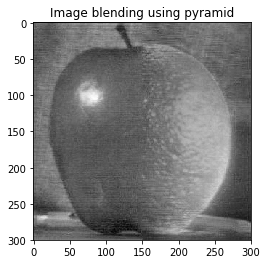

In [30]:
def pyramid_blend (img1, img2): 
    row, col = img1.shape 
    #Laplacian pyramids of 2 images 
    pl_img1 = tuple(transform.pyramid_laplacian(img1, 6)) 
    pl_img2 = tuple(transform.pyramid_laplacian(img2, 6)) 
     
    #define a mask (0 at the left, 1 at the right) 
    mask = np.zeros(img1.shape).astype(float)/255 
    mask[:, : int(np.ceil(col/2))] = 1.0 
    mask[:, int(np.ceil(col/2)) :] = 0.0 
    #create gaussian of mask 
    gaussian_mask = tuple(transform.pyramid_gaussian(mask, 6)) 
 
    #blend two Laplacian pyramids applying mask 
    blended_pyr = [] 
    k = len(gaussian_mask) 
    for i in range(0,k): 
        p1= gaussian_mask[i]*pl_img1[i] 
        p2=(1 - gaussian_mask[i])*pl_img2[i] 
        blended_pyr.append(p1 + p2) 
   
    #collapse the pyramid 
    pyr = blended_pyr[6]   
    for i in range(5,-1,-1): 
        pyr = transform.pyramid_expand(pyr)  
        if pyr.shape > blended_pyr[i].shape: 
            pyr = np.delete(pyr, (-1), axis=0) 
            pyr = np.delete(pyr, (-1), axis=1) 
        pyr = pyr + blended_pyr[i] 
    return pyr 
 
     
blend_img = pyramid_blend(apple_gray, orange_gray) 
 
plt.imshow(blend_img, cmap = cm.gray) 
plt.title ('Image blending using pyramid') 